<a href="https://colab.research.google.com/github/les1smore/DATA606-Capstone-Project/blob/main/7_Threshold_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Threshold Tuning

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, accuracy_score

In [ ]:
def get_scores(y_test, y_pred, model):
        """
        Build a data frame containing all classification metrics and confusion matrix results.
        """
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() # Convert to 1-D array
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = tn/(tn+fp)

        all_scores = {'Model Name':[model], 'Precision':[precision],
                    'Recall':[recall], 'F1 Score':[f1],
                    'Specificity':[specificity], 'Accuracy':[acc]}
        df_score = pd.DataFrame(data=all_scores)
        return df_score

def get_pred_prob(prob, cutoff):

        """
        Convert probabilities to class labels based on the cutoff we choose.
        """
        pred = []
        for x in prob[:,1]:
            if x > cutoff:
                pred.append(1)

            else:
                pred.append(0)
        return pred



## Random Forest

In [ ]:
# Random Forest
rfc_tuned = RandomForestClassifier(min_samples_split = 6,
                             max_depth=32,
                             n_estimators=15)

rfc_tuned.fit(X_train, y_train)

predicted_rfc = rfc_tuned.predict(X_test)

In [ ]:
y_test.nunique()

2

In [ ]:
y_test_1d = y_test.values.reshape(-1,1)

In [ ]:
y_test_1d.shape

(94756, 1)

Random Forest: ROC AUC = 0.8922


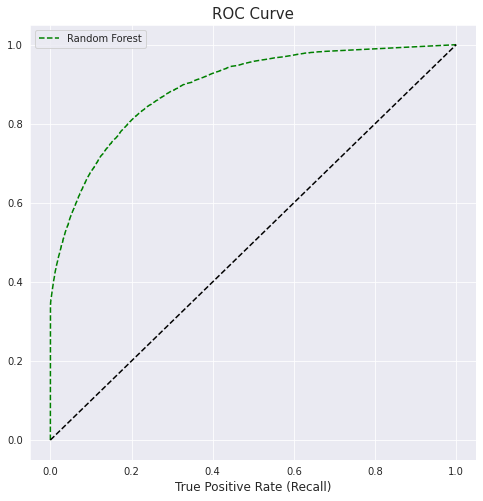

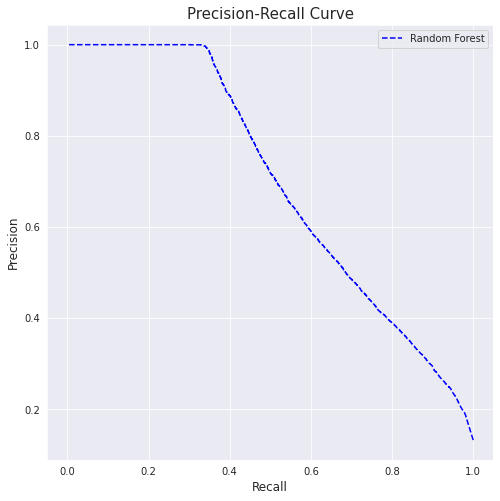

In [ ]:
prob_rfc = rfc_tuned.predict_proba(X_test)

# Calculate ROC-AUC score
print("Random Forest: ROC AUC = %.4f" % roc_auc_score(y_test_1d, prob_rfc[:, 1]))


# Plot the ROC curve
clf_fpr, clf_tpr, _ = roc_curve(y_test_1d, prob_rfc[:,1])
plt.figure(figsize=(8,8))
plt.plot(clf_fpr, clf_tpr, 'g--', label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('True Positive Rate (Recall)', fontsize=12)
plt.legend()
plt.title('ROC Curve', fontsize=15)
plt.show()

# Plot the Precision-Recall curve
clf_precision, clf_recall, thresholds = precision_recall_curve(y_test, prob_rfc[:, 1])
plt.figure(figsize=(8,8))
plt.plot(clf_recall, clf_precision, 'b--', label='Random Forest')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend()
plt.title('Precision-Recall Curve', fontsize=15)
plt.show()

In [ ]:
# Find the index where the Recall value is greater than 0.8
res = np.where(clf_recall > 0.8)
for i in res:
    print(i)

[    0     1     2 ... 12792 12793 12794]


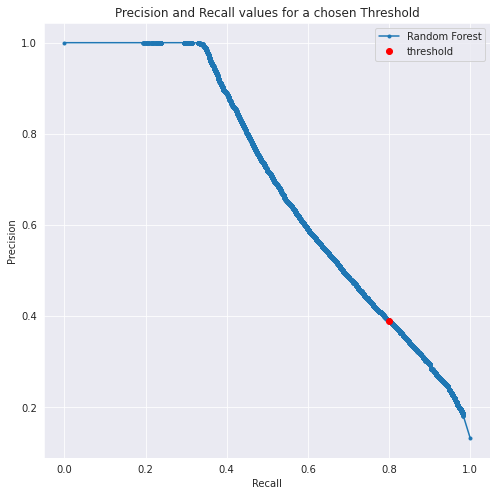

In [ ]:
# Plot the threshold
plt.figure(figsize=(8,8))
plt.plot(clf_recall, clf_precision, marker='.', label='Random Forest')
plt.plot(clf_recall[12792], clf_precision[12792], "ro", label="threshold")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision and Recall values for a chosen Threshold')
plt.show()

In [ ]:
# Get the threshold value - t = 0.1286
print("Threshold value = %.4f" % thresholds[12792])

# Predict again with the chosen threshold
opt_pred = get_pred_prob(prob_rfc, thresholds[12792])
get_scores(y_test, opt_pred, 'Random Forest, optimized t')

Threshold value = 0.1444


,Model Name,Precision,Recall,F1 Score,Specificity,Accuracy
0,"Random Forest, optimized t",0.389834,0.800366,0.524299,0.808524,0.807442


Now we tuned the model to have high recall at 80% and high accuracy at around 81%.

## XGBoost

In [ ]:
from xgboost import XGBClassifier 
# Fit the classifier again with tuned hyperparameters
class_size = data['Have_Diabetes'].value_counts()
scale_pos_weight = class_size[0]/class_size[1] # total negative examples / total positive examples

xgb_tuned = XGBClassifier(min_child_weight = 1,
                             max_depth=1,
                             n_estimators=152, 
                             scale_pos_weight = scale_pos_weight)  # Handle the class imbalance

xgb_tuned.fit(X_train, y_train)

predicted_xgb = xgb_tuned.predict(X_test)

XGBoost: ROC AUC = 0.9071


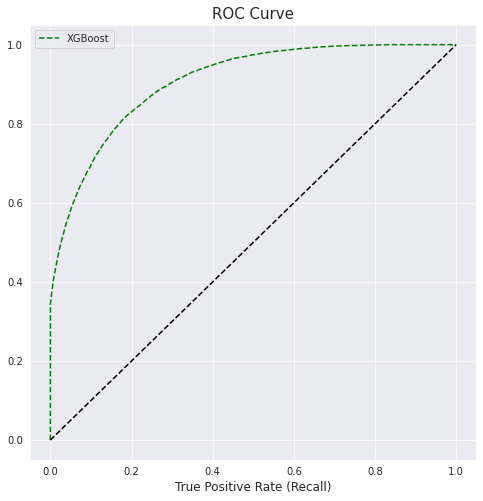

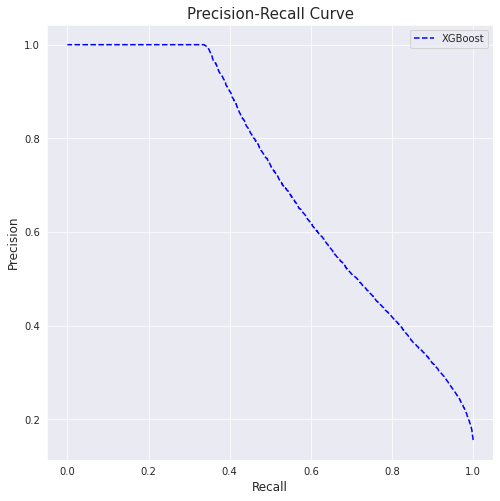

In [ ]:
prob_xgb = xgb_tuned.predict_proba(X_test)

# Calculate ROC-AUC score
print("XGBoost: ROC AUC = %.4f" % roc_auc_score(y_test_1d, prob_xgb[:, 1]))


# Plot the ROC curve
clf_fpr, clf_tpr, _ = roc_curve(y_test_1d, prob_xgb[:,1])
plt.figure(figsize=(8,8))
plt.plot(clf_fpr, clf_tpr, 'g--', label='XGBoost')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('True Positive Rate (Recall)', fontsize=12)
plt.legend()
plt.title('ROC Curve', fontsize=15)
plt.show()

# Plot the Precision-Recall curve
clf_precision, clf_recall, thresholds = precision_recall_curve(y_test, prob_xgb[:, 1])
plt.figure(figsize=(8,8))
plt.plot(clf_recall, clf_precision, 'b--', label='XGBoost')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend()
plt.title('Precision-Recall Curve', fontsize=15)
plt.show()

In [ ]:
# Find the index where the Recall value is greater than 0.8
res = np.where(clf_recall > 0.9)
for i in res:
    print(i)

[   0    1    2 ... 5381 5382 5383]


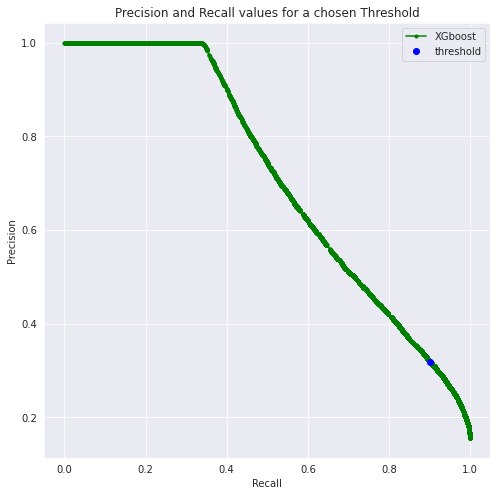

In [ ]:
# Plot the threshold
plt.figure(figsize=(8,8))
plt.plot(clf_recall, clf_precision, marker='.', color='green',label='XGboost')
plt.plot(clf_recall[5381], clf_precision[5381], "bo", label="threshold")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision and Recall values for a chosen Threshold')
plt.show()

In [ ]:
print("Threshold value = %.4f" % thresholds[5381])

Threshold value = 0.3827


In [ ]:
# Get the threshold value - t = 0.3827
print("Threshold value = %.4f" % thresholds[5381])

# Predict again with the chosen threshold
opt_pred = get_pred_prob(prob_xgb, thresholds[5381])
get_scores(y_test, opt_pred, 'XGBoost, optimized t')

Threshold value = 0.3827


,Model Name,Precision,Recall,F1 Score,Specificity,Accuracy
0,"XGBoost, optimized t",0.318818,0.901536,0.471053,0.705583,0.731563


Compared to Random Forest model, XGBoost classifier's accuracy slightly decreased to 73%, while recall increased to nearly 90%.